In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

import tensorflow as tf

In [83]:
df = pd.read_csv("UtilifyDB.csv")

In [84]:
df.head()

,track_id,artist,track_name,tempo,energy,danceability,popularity,rating
0,0v1Yg2zOk3t0YoW8NWsgWt,Jador,Dau Moda,139,79,82,48,1
1,0lAHTMVZKx0onEJRNYucFe,Iuly Neamtu,Lololo lolali,169,91,49,35,1
2,4JHL5XOuByjoHSt5bcVk0u,ACRAZE,Do It To It - Subtronics Remix,72,92,70,51,0
3,7fZBQnc0zXwVybgCIrQQil,Imanbek,Belly Dancer,121,79,84,85,1
4,20on25jryn53hWghthWWW3,ACRAZE,Do It To It,124,80,85,83,1


In [85]:
df.columns

Index(['track_id', 'artist', 'track_name', 'tempo', 'energy', 'danceability',
       'popularity', 'rating'],
      dtype='object')

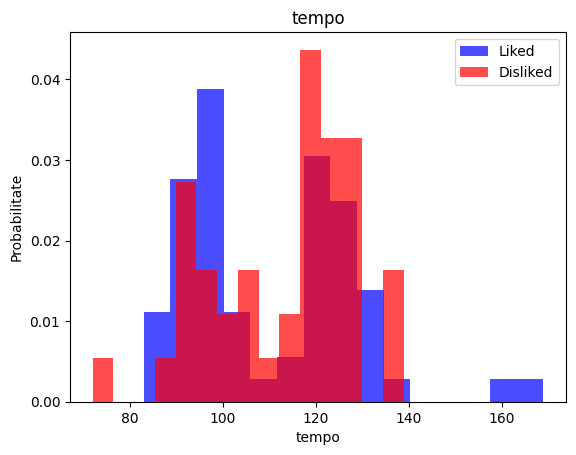

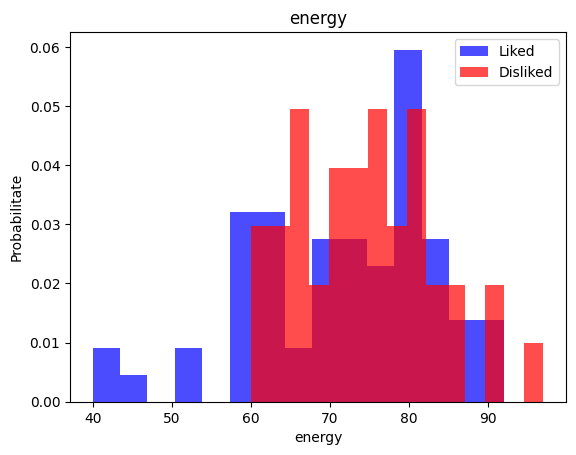

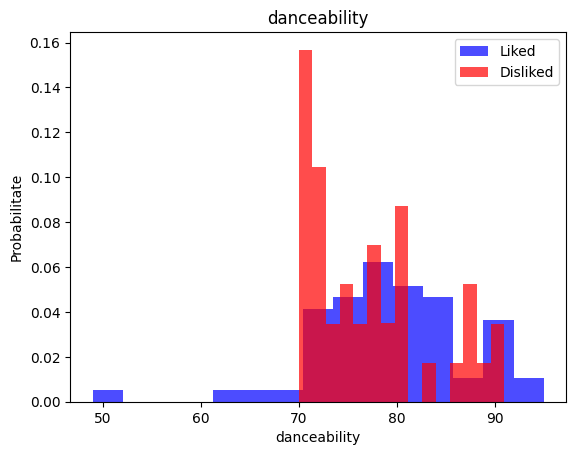

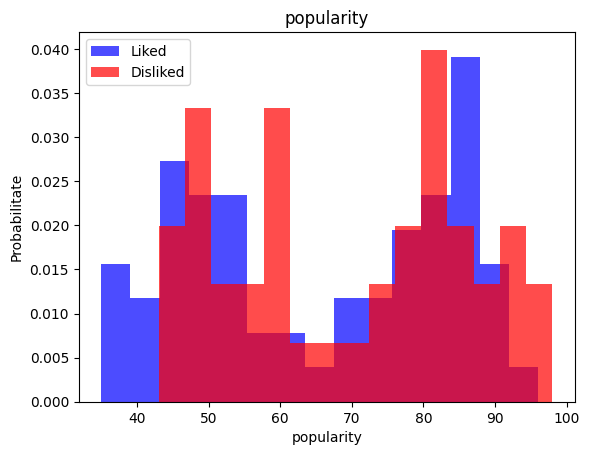

In [86]:
for i in range(3,len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['rating']==1][label], label='Liked', color="blue", alpha=0.7, density=True, bins=15)
  plt.hist(df[df['rating']==0][label], label='Disliked', color="red", alpha=0.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel('Probabilitate')
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [87]:
x = df[df.columns[3:-1]].values
y = df[df.columns[-1]].values

In [88]:
over = RandomOverSampler()
x, y = over.fit_resample(x, y)
data = np.hstack((x, np.reshape(y, (-1,1))))
df2 = pd.DataFrame(data, columns=df.columns[3:])

In [89]:
len(df2[df2['rating']==1]), len(df2[df2['rating']==0])

(63, 63)

In [90]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=0)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0)

In [91]:
model = None
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [92]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [93]:
model.evaluate(x_valid, y_valid)

1/1 [==============================] - 0s 439ms/step - loss: 3.0726 - accuracy: 0.6000


[3.0725700855255127, 0.6000000238418579]

In [94]:
model.evaluate(x_train, y_train)

3/3 [==============================] - 0s 6ms/step - loss: 4.1615 - accuracy: 0.5200


[4.161547660827637, 0.5199999809265137]

In [98]:
history = model.fit(x_train, y_train, batch_size=16, epochs=400, validation_data=(x_valid, y_valid))

Epoch 1/400
5/5 [==============================] - 0s 25ms/step - loss: 0.6325 - accuracy: 0.6267 - val_loss: 0.8804 - val_accuracy: 0.6800
Epoch 2/400
5/5 [==============================] - 0s 17ms/step - loss: 0.6345 - accuracy: 0.6267 - val_loss: 0.8905 - val_accuracy: 0.6800
Epoch 3/400
5/5 [==============================] - 0s 14ms/step - loss: 0.6432 - accuracy: 0.5867 - val_loss: 0.9049 - val_accuracy: 0.6400
Epoch 4/400
5/5 [==============================] - 0s 12ms/step - loss: 0.6179 - accuracy: 0.6400 - val_loss: 0.9111 - val_accuracy: 0.6400
Epoch 5/400
5/5 [==============================] - 0s 13ms/step - loss: 0.6413 - accuracy: 0.5733 - val_loss: 0.9072 - val_accuracy: 0.6400
Epoch 6/400
5/5 [==============================] - 0s 13ms/step - loss: 0.6597 - accuracy: 0.5867 - val_loss: 0.8870 - val_accuracy: 0.6000
Epoch 7/400
5/5 [==============================] - 0s 16ms/step - loss: 0.6178 - accuracy: 0.6133 - val_loss: 0.8808 - val_accuracy: 0.6000
Epoch 8/400
5/5 [===

In [100]:
model.evaluate(x, y)

4/4 [==============================] - 0s 7ms/step - loss: 0.6945 - accuracy: 0.5873


[0.694513738155365, 0.5873016119003296]

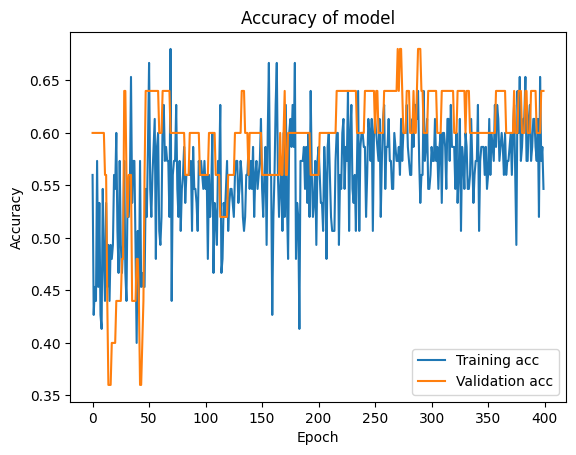

In [97]:
plt.plot(history.history['accuracy'], label="Training acc")
plt.plot(history.history['val_accuracy'], label="Validation acc")
plt.title("Accuracy of model")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

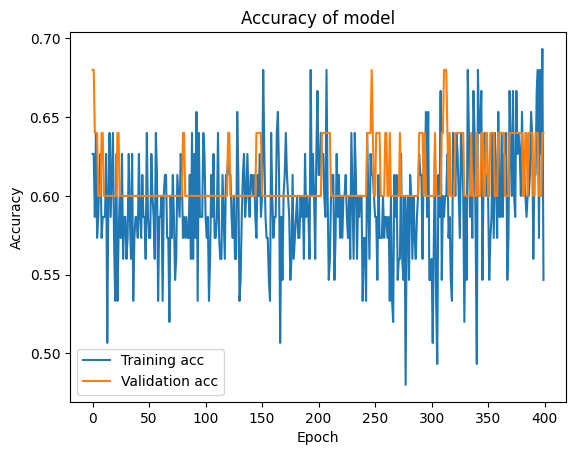

In [101]:
plt.plot(history.history['accuracy'], label="Training acc")
plt.plot(history.history['val_accuracy'], label="Validation acc")
plt.title("Accuracy of model")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [102]:
model.save('utilify-ai.h5')

In [78]:
!zip -r UtilifyAI.zip utilify.ai

updating: utilify.ai/ (stored 0%)
updating: utilify.ai/assets/ (stored 0%)
updating: utilify.ai/fingerprint.pb (stored 0%)
updating: utilify.ai/keras_metadata.pb (deflated 87%)
updating: utilify.ai/saved_model.pb (deflated 88%)
updating: utilify.ai/variables/ (stored 0%)
  adding: utilify.ai/variables/variables.index (deflated 60%)
  adding: utilify.ai/variables/variables.data-00000-of-00001 (deflated 47%)


In [104]:
print(type(x[0]))

<class 'numpy.ndarray'>
